In [47]:
import matplotlib.pyplot as plt
import os
import numpy as np
import glob
import pandas as pd

In [1]:
DATASET_PATH = 'data_process/dsb_data_with/'

In [57]:
label_paths = []

for path in ['train', 'test', 'valid']:
    label_paths += glob.glob(os.path.join(DATASET_PATH, 'labels', path, '*.txt'))

label_paths = list(sorted(label_paths))

classes = open(os.path.join(DATASET_PATH, 'classes.txt'), 'r').read().splitlines()

In [58]:
print('Received folder path:',DATASET_PATH)
print('Number of labels:', len(label_paths))
print('Classes:', classes)

Received folder path: data_process/dsb_data_without/
Number of labels: 2110
Classes: ['1_AND_2', '1_AND_4', '1_AND_3', '2_AND_4', 'OTHER']


In [59]:
labels = []

for label_path in label_paths:
    lines = open(label_path, 'r').read().splitlines()
    
    for line in lines:
        type, x, y, w, h = line.split(' ')
        x, y, w, h = float(x), float(y), float(w), float(h)
        
        type = classes[int(type)]
        labels.append([type, x, y, w, h])
        
labels = pd.DataFrame(labels, columns=['type', 'x', 'y', 'w', 'h'])
labels.head()

,type,x,y,w,h
0,1_AND_2,0.465885,0.519444,0.011198,0.022222
1,1_AND_2,0.465862,0.520118,0.011458,0.022407
2,1_AND_2,0.465388,0.520623,0.011458,0.022407
3,1_AND_2,0.454390,0.534788,0.011458,0.022989
4,1_AND_2,0.453497,0.536376,0.011458,0.024735


In [60]:
labels.describe()

,x,y,w,h
count,3410.000000,3410.000000,3410.000000,3410.000000
mean,0.496276,0.491072,0.025245,0.056196
std,0.186668,0.152256,0.015082,0.035101
min,0.016146,0.065319,0.006250,0.011111
25%,0.384154,0.387533,0.014844,0.031481
50%,0.479687,0.527168,0.021012,0.045833
75%,0.604883,0.592614,0.030469,0.068981
max,0.992448,0.976389,0.122591,0.267141


<AxesSubplot:xlabel='type'>

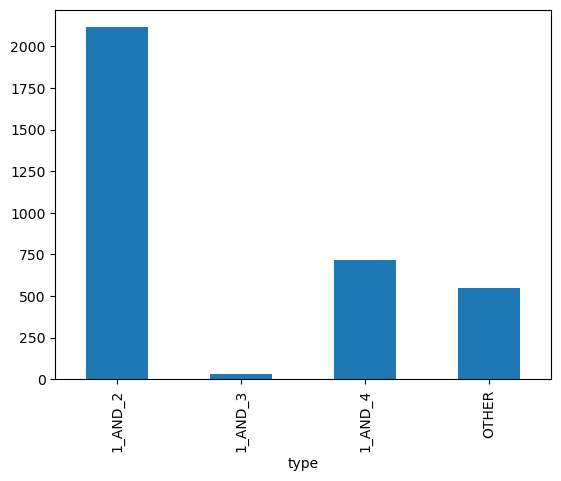

In [61]:
labels.groupby('type')['type'].describe()['count'].plot.bar()